In [2]:
!pip install datasets[vision] keras tensorflow opencv-python-headless matplotlib scikit-learn 

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for datasets[vision] from https://files.pythonhosted.org/packages/09/7e/fd4d6441a541dba61d0acb3c1fd5df53214c2e9033854e837a99dd9e0793/datasets-2.14.5-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e2/7a/c7762c698fb1ac41a7e3afee51dc72aa3ec74ae8d2f57ce19a9cded3a4af/tensorflow-2.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/9d/d7/e2aaf344254292d2046f9984b54212e4e7d69a57d30ae15e7294840710f6/opencv_python_headless-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pyarrow>=8.0.0 from https://files.pythonhosted.org/packages/a1/14/4ffed5e85b96f0c0ae9e026f940bf71ac7dfbfbffff9f3fe339e32bfce2c/pyarrow-13.0.0-cp310-cp310

In [118]:
# import modules
import datasets
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from functools import partial
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.manifold import TSNE
from PIL import Image

import tensorflow as tf
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import (load_img, img_to_array)
from tensorflow.keras.applications.vgg16 import (VGG16, preprocess_input)

ModuleNotFoundError: No module named 'seaborn'

In [2]:
features_train = np.load('../features_train.npy')
features_test = np.load('../features_test.npy')

Trying to get clustering to work with just the raw vgg16 features ('features_train')

In [3]:
# calculate euclidian distance
dist = np.linalg.norm(features_test[0]-features_test[1])
print(dist)

99.242805


In [4]:
tsne_subset = features_test[0:1000]

In [5]:
images = datasets.load_from_disk("../datasets/wiki_test")
images = images.select(list(range(1000)))['image']

In [6]:
X = np.array(tsne_subset)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 16.631070
[t-SNE] Computed conditional probabilities in 0.032s
[t-SNE] Iteration 50: error = 74.0120010, gradient norm = 0.2789294 (50 iterations in 0.368s)
[t-SNE] Iteration 100: error = 76.1175079, gradient norm = 0.2361751 (50 iterations in 0.165s)
[t-SNE] Iteration 150: error = 77.4233475, gradient norm = 0.2346362 (50 iterations in 0.154s)
[t-SNE] Iteration 200: error = 76.0675049, gradient norm = 0.3487461 (50 iterations in 0.154s)
[t-SNE] Iteration 250: error = 77.5480728, gradient norm = 0.2031738 (50 iterations in 0.151s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.548073
[t-SNE] Iteration 300: error = 1.7568942, gradient norm = 0.0082388 (50 iterations in 0.132s)
[t-SNE] Iteration 350: error = 1.6861572, gradient norm = 0.0028

In [7]:
#The variable tsne contains an array of unnormalized 2d points, corresponding to the embedding. In the next cell, we normalize the embedding so that lies entirely in the range (0,1).

tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

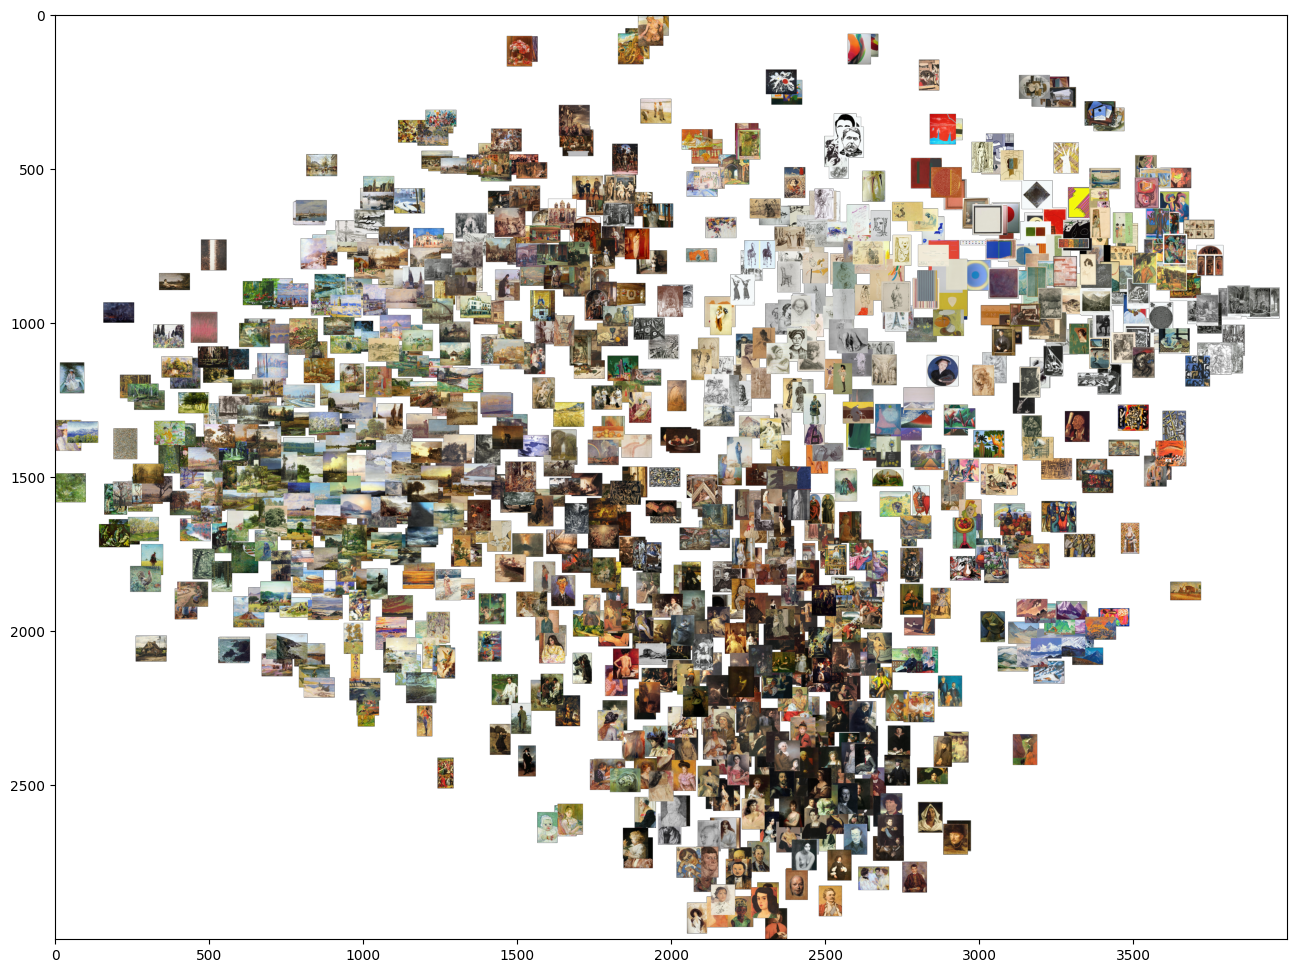

In [8]:
width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = img
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.LANCZOS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [11]:
full_image.save("example-tSNE.png")

## t-SNE clustering with reconstructed images

In [10]:
autoencoder = tf.keras.models.load_model('../models/autoencoder_small.keras')

2023-10-10 14:58:51.132243: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
reconstructions = autoencoder.predict(features_test)

210/313 [===================>..........] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


In [15]:
reconstructed_subset = reconstructions[0:1000]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 16.354666
[t-SNE] Computed conditional probabilities in 0.034s
[t-SNE] Iteration 50: error = 71.6063232, gradient norm = 0.1141949 (50 iterations in 0.409s)
[t-SNE] Iteration 100: error = 70.6564713, gradient norm = 0.1515075 (50 iterations in 0.214s)
[t-SNE] Iteration 150: error = 72.0443344, gradient norm = 0.1917938 (50 iterations in 0.170s)
[t-SNE] Iteration 200: error = 72.7663956, gradient norm = 0.1348386 (50 iterations in 0.243s)
[t-SNE] Iteration 250: error = 73.2690277, gradient norm = 0.1099797 (50 iterations in 0.251s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.269028
[t-SNE] Iteration 300: error = 1.6844909, gradient norm = 0.0073065 (50 iterations in 0.168s)
[t-SNE] Iteration 350: error = 1.5870439, gradient norm = 0.0031

[t-SNE] Iteration 450: error = 1.5445689, gradient norm = 0.0021389 (50 iterations in 0.152s)
[t-SNE] Iteration 500: error = 1.5394789, gradient norm = 0.0015140 (50 iterations in 0.149s)
[t-SNE] Iteration 550: error = 1.5365757, gradient norm = 0.0016582 (50 iterations in 0.130s)
[t-SNE] Iteration 600: error = 1.5345242, gradient norm = 0.0008528 (50 iterations in 0.131s)
[t-SNE] Iteration 650: error = 1.5338789, gradient norm = 0.0006077 (50 iterations in 0.133s)
[t-SNE] Iteration 700: error = 1.5334612, gradient norm = 0.0008508 (50 iterations in 0.126s)
[t-SNE] Iteration 750: error = 1.5326749, gradient norm = 0.0004205 (50 iterations in 0.137s)
[t-SNE] Iteration 800: error = 1.5325187, gradient norm = 0.0003266 (50 iterations in 0.150s)
[t-SNE] Iteration 850: error = 1.5323333, gradient norm = 0.0004591 (50 iterations in 0.160s)
[t-SNE] Iteration 900: error = 1.5321777, gradient norm = 0.0002462 (50 iterations in 0.159s)
[t-SNE] Iteration 950: error = 1.5320851, gradient norm = 0.

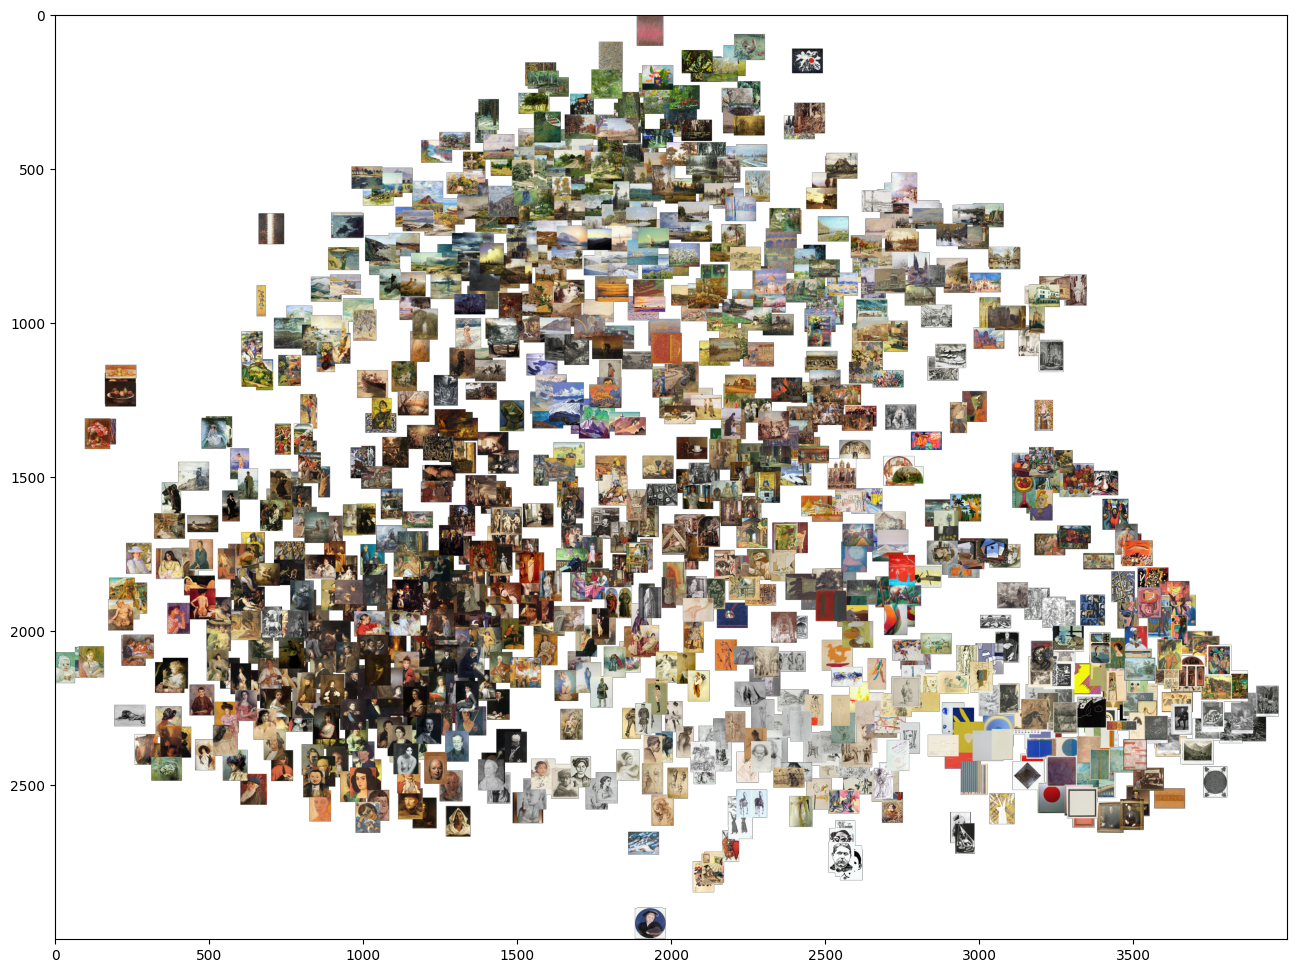

In [16]:
X = np.array(reconstructed_subset)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = img
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.LANCZOS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [ ]:
full_image.save("../plots/reconstructed-tSNE.png")

## embeddings descriptive stats

In [9]:
features_test.shape

(10000, 512)

In [13]:
reconstructions.shape

(10000, 512)

In [44]:
# squared error for each feature
se_per_feature = (features_test - reconstructions) ** 2

# which features in the embedding causes the most error?
se_per_dimension = np.average(se_per_feature, axis=0)
# which images have the highest reconstruction error?
se_per_image = np.average(se_per_feature, axis=1)

# total mse
se_total = np.average(se_per_dimension)
se_total_distribution = np.quantile(se_per_dimension, [0, 0.25, 0.5, 0.75, 1])

In [51]:
# per-dimension se distribution
np.quantile(
    se_per_dimension, [0, 0.25, 0.5, 0.75, 1]
)

array([ 0.64535284,  1.29547051,  1.57319421,  1.77081054, 10.00463867])

In [50]:
# per-image se distribution
np.quantile(
    se_per_image, [0, 0.25, 0.5, 0.75, 1]
)

array([ 0.07768844,  0.80764827,  1.38202202,  2.18296391, 20.62799454])

## figuring out how to calculate entropy

note, to calculate entropy of feature vectors you could do one the following:
- A) softmax feature vector, entropy
- B) create a histogram with n<len(features) bins, entropy
- C) softmax feature vector, histogram, entropy

In [71]:
x = features_train[0, :]

In [74]:
## A

softmaxed_x = np.exp(x)/sum(np.exp(x))
entropy_a = -np.sum(softmaxed_x * np.log2(softmaxed_x + np.finfo(float).eps))

entropy_a

0.65808195

In [78]:
## B

hist, bin_edges = np.histogram(x, bins=256) 
hist_norm = hist / hist.sum()
entropy_b = -np.sum(hist_norm * np.log2(hist_norm + np.finfo(float).eps))

entropy_b

5.194899202494869

In [83]:
## C

softmaxed_x = np.exp(x)/sum(np.exp(x))
hist, bin_edges = np.histogram(softmaxed_x, bins=256, range=(0, 1))
hist_norm = hist / hist.sum()
entropy_c = -np.sum(hist_norm * np.log2(hist_norm + np.finfo(float).eps))

entropy_c

0.061162852241153205

i choose B

it's the most similar to how PIL, the image library for python does it:
- docs: https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.entropy
- source code in c – https://github.com/python-pillow/Pillow/blob/4ecf1df4ea63457040f63adaeea35996913b6ac1/src/_imaging.c#L1308

In [90]:
## i choose B

def calc_vector_entropy(x, bins=256):
    # calculate a histogram
    hist, bin_edges = np.histogram(x, bins=bins)
    # normalize histogram to sum to one
    hist_norm = hist / hist.sum()
    # entropy with log2 + add a small constant to avoid log(0)
    H = -np.sum(hist_norm * np.log2(hist_norm + np.finfo(float).eps))

    return H

# Qs

In [97]:
# entropy of raw images
# TODO

# entropy of features
H_features = np.apply_along_axis(calc_vector_entropy, axis=1, arr=features_test)

# entropy of reconstructions
H_reconstructions = np.apply_along_axis(calc_vector_entropy, axis=1, arr=reconstructions)

H_reconstructions.shape

(10000,)

Is entropy in the raw image related to entropy the feature vector?

In [ ]:
# TODO

Are entropies of feature vectors and their reconstructions related?

Yes, very.

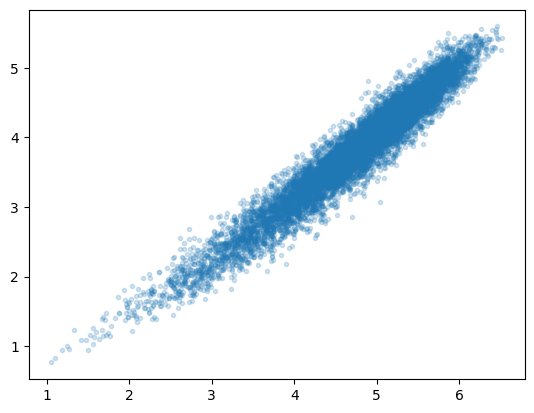

In [103]:
plt.plot(
    H_features, H_reconstructions, '.', alpha=0.2
)

Is entropy of the feature vector related to the reconstruction error?

Somewhat, but very weakly.  
Most hard-to-reconstruct images are also high entropy, but other (unknown) variables are at play.

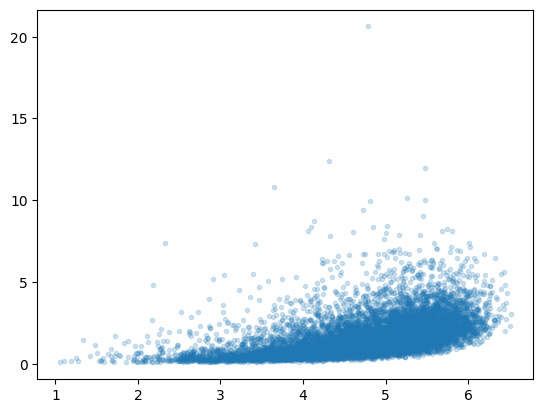

In [106]:
# not really

plt.plot(
    H_features, se_per_image, '.', alpha=0.2
)

(array([7.368e+03, 2.274e+03, 2.910e+02, 5.400e+01, 9.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.07768844,  2.13271904,  4.18774986,  6.24278021,  8.29781055,
        10.35284138, 12.4078722 , 14.46290302, 16.51793289, 18.57296371,
        20.62799454]),
 <BarContainer object of 10 artists>)

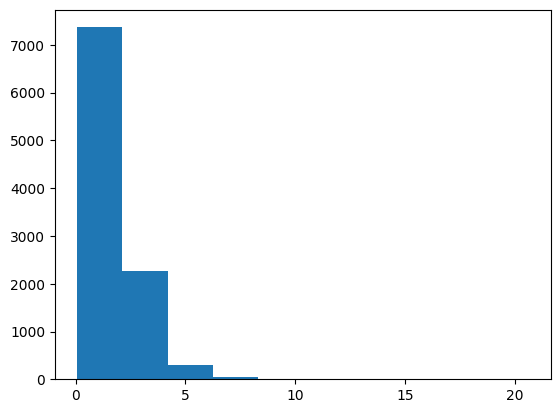

In [111]:
# i'll consider reconstruction error > 5 as super high

plt.hist(se_per_image)

Text(0, 0.5, 'entropy of the feature vector')

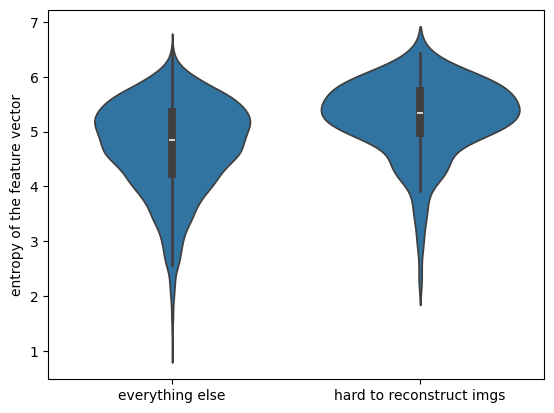

In [129]:
# !pip install seaborn
# import seaborn as sns

high_re_mask = ["hard to reconstruct imgs" if error >= 5 else "everything else" for error in se_per_image]

sns.violinplot(
    x=high_re_mask,
    y=H_features,
    # density_norm='count',
)

plt.ylabel('entropy of the feature vector')